In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)   # Show all rows without turnication
pd.set_option('display.max_columns', None) #show all columns without turnication
df = pd.read_csv("mobile_data.csv", encoding="ISO-8859-1") #specified encoding for special chars if present in the  data set
#print(df.shape) #display the dimensions of the data frame as a tupple
#df.head(930)  #default  id turnication 
df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
5,Apple,iPhone 16 Plus 512GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 274,999","INR 104,999","CNY 6,999",USD 999,"AED 3,599",2024
6,Apple,iPhone 16 Pro 128GB,206g,6GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 284,999","INR 99,999","CNY 6,999",USD 999,"AED 3,499",2024
7,Apple,iPhone 16 Pro 256GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 294,999","INR 104,999","CNY 7,099","USD 1,049","AED 3,699",2024
8,Apple,iPhone 16 Pro 512GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 314,999","INR 114,999","CNY 7,499","USD 1,099","AED 3,899",2024
9,Apple,iPhone 16 Pro Max 128GB,221g,6GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,"PKR 314,999","INR 109,999","CNY 7,499","USD 1,099","AED 3,799",2024


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [169]:
# Define exchange rates manually (1 unit in local currency = X USD)
exchange_rates = {
    'PKR': 0.0036,  # 1 PKR = 0.0036 USD
    'INR': 0.012,   # 1 INR = 0.012 USD
    'CNY': 0.14,    # 1 CNY = 0.14 USD
    'USD': 1.0,     # 1 USD = 1 USD
    'AED': 0.27     # 1 AED = 0.27 USD
}

# Columns to process
columns_to_change = ['Launched Price (Pakistan)', 'Launched Price (India)',
                     'Launched Price (China)', 'Launched Price (USA)', 
                     'Launched Price (Dubai)']

# Convert to USD
for col in columns_to_change:
    df[col] = df[col].astype(str)  # Ensure string type
    df[col + ' (USD)'] = df[col].apply(
        lambda x: exchange_rates.get(x.split()[0], None) * float(x.split()[1].replace(',', '')) 
        if isinstance(x, str) and len(x.split()) == 2 and x.split()[0] in exchange_rates else None
    )

# Drop original columns
df = df.drop(columns=columns_to_change)

In [170]:
df.info() #rows*cols , non null content, datatype 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company Name                     930 non-null    object 
 1   Model Name                       930 non-null    object 
 2   Mobile Weight                    930 non-null    object 
 3   RAM                              930 non-null    object 
 4   Front Camera                     930 non-null    object 
 5   Back Camera                      930 non-null    object 
 6   Processor                        930 non-null    object 
 7   Battery Capacity                 930 non-null    object 
 8   Screen Size                      930 non-null    object 
 9   Launched Year                    930 non-null    int64  
 10  Launched Price (Pakistan) (USD)  929 non-null    float64
 11  Launched Price (India) (USD)     930 non-null    float64
 12  Launched Price (China)

In [171]:
df.dropna(inplace=True) #drop all null rows 


In [172]:
# Convert columns to string first, then remove units and convert to numbers
df['Mobile Weight'] = df['Mobile Weight'].astype(str).str.replace('g', '').astype(float)
df['RAM'] = df['RAM'].astype(str).str.split('/').str[0].str.extract(r'(\d+)').astype(float)
df['Front Camera'] = df['Front Camera'].astype(str).str.split('/').str[0].str.extract(r'(\d+\.?\d*)').astype(float)
df['Back Camera'] = df['Back Camera'].astype(str).str.split('+').str[0].str.extract(r'(\d+\.?\d*)').astype(float)
df['Battery Capacity'] = df['Battery Capacity'].astype(str).str.replace(',', '').str.replace('mAh', '').astype(float)
df['Screen Size'] = df['Screen Size'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 928 entries, 0 to 928
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Company Name                     928 non-null    object 
 1   Model Name                       928 non-null    object 
 2   Mobile Weight                    928 non-null    float64
 3   RAM                              928 non-null    float64
 4   Front Camera                     928 non-null    float64
 5   Back Camera                      928 non-null    float64
 6   Processor                        928 non-null    object 
 7   Battery Capacity                 928 non-null    float64
 8   Screen Size                      928 non-null    float64
 9   Launched Year                    928 non-null    int64  
 10  Launched Price (Pakistan) (USD)  928 non-null    float64
 11  Launched Price (India) (USD)     928 non-null    float64
 12  Launched Price (China) (USD

In [174]:
df.describe()  #count = freq , mean = avg , std = standard deviation, 25% -> quatrile1

,Mobile Weight,RAM,Front Camera,Back Camera,Battery Capacity,Screen Size,Launched Year,Launched Price (Pakistan) (USD),Launched Price (India) (USD),Launched Price (China) (USD),Launched Price (USA) (USD),Launched Price (Dubai) (USD)
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,228.243966,7.774784,18.180603,46.757328,5027.512931,7.082683,2022.189655,449.709455,603.497108,531.325948,622.383254,586.307328
std,105.544997,3.179277,11.993146,31.103036,1356.697382,1.535156,1.862194,361.509183,486.369098,379.253404,1347.294092,416.834549
min,135.000000,1.000000,2.000000,5.000000,2000.000000,5.000000,2014.000000,57.596400,71.988000,69.860000,79.000000,80.730000
25%,185.000000,6.000000,8.000000,15.250000,4440.000000,6.500000,2021.000000,197.996400,239.988000,237.860000,250.000000,270.000000
50%,194.000000,8.000000,16.000000,50.000000,5000.000000,6.670000,2023.000000,305.998200,419.988000,392.000000,449.000000,452.250000
75%,208.000000,8.000000,32.000000,50.000000,5100.000000,6.780000,2024.000000,647.996400,898.800000,769.860000,849.000000,863.730000
max,732.000000,16.000000,60.000000,200.000000,11200.000000,14.600000,2025.000000,1980.000000,3299.988000,2519.860000,39622.000000,2996.730000


In [175]:
import warnings
warnings.filterwarnings("ignore") #clean console

In [176]:
print("Descriptive Stats and Summary: ")

Descriptive Stats and Summary: 


In [177]:
df.median(numeric_only=True)

Mobile Weight                       194.0000
RAM                                   8.0000
Front Camera                         16.0000
Back Camera                          50.0000
Battery Capacity                   5000.0000
Screen Size                           6.6700
Launched Year                      2023.0000
Launched Price (Pakistan) (USD)     305.9982
Launched Price (India) (USD)        419.9880
Launched Price (China) (USD)        392.0000
Launched Price (USA) (USD)          449.0000
Launched Price (Dubai) (USD)        452.2500
dtype: float64

In [178]:
# General Trends
general_trends = [
    "The average mobile weight is around 228g, but the median weight is 194g, indicating that most devices are lighter while a few heavier models (up to 732g) pull the average up.",
    "RAM typically falls around 8GB, with a minimum of 1GB and a maximum of 16GB.",
    "The front camera averages 18MP, with a median of 16MP.",
    "The back camera averages 47MP, with a median of 50MP and some premium models reaching 200MP.",
    "Battery capacity has a mean of 5028mAh and a median of 5000mAh, with values ranging from 2000mAh to 11200mAh.",
    "Screen sizes vary from 5.0 to 14.6 inches, with an average of 7.08 inches and a median of 6.67 inches, suggesting that most devices are slightly below the mean.",
    "The majority of phones are from 2022 to 2024, with a median launch year of 2023, though some older models date back to 2014."
]

# Pricing Insights
pricing_insights = [
    "The median price in Pakistan is around 306, while the mean is higher at 449.71 due to expensive models in the dataset, with prices ranging from 57 to 1980.",
    "In India, the median price is 420, while the mean is 603.50, with a maximum price of 3299.",
    "In China, the median price is 392, slightly lower than in India, with a mean of 531.33 and prices ranging from 70 to 2519.",
    "In the USA, the median price is 449, but the mean is significantly inflated at 622.38 due to an extreme outlier at 39,622.",
    "Dubai has a median price of 452.25, closely matching the USA, with a mean of 586.31 and prices ranging from 81 to 2997."
]

# Printing General Trends
print("General Trends:")
for trend in general_trends:
    print(f"• {trend}")

# Printing Pricing Insights
print("\nPricing Insights:")
for price in pricing_insights:
    print(f"• {price}")


General Trends:
• The average mobile weight is around 228g, but the median weight is 194g, indicating that most devices are lighter while a few heavier models (up to 732g) pull the average up.
• RAM typically falls around 8GB, with a minimum of 1GB and a maximum of 16GB.
• The front camera averages 18MP, with a median of 16MP.
• The back camera averages 47MP, with a median of 50MP and some premium models reaching 200MP.
• Battery capacity has a mean of 5028mAh and a median of 5000mAh, with values ranging from 2000mAh to 11200mAh.
• Screen sizes vary from 5.0 to 14.6 inches, with an average of 7.08 inches and a median of 6.67 inches, suggesting that most devices are slightly below the mean.
• The majority of phones are from 2022 to 2024, with a median launch year of 2023, though some older models date back to 2014.

Pricing Insights:
• The median price in Pakistan is around 306, while the mean is higher at 449.71 due to expensive models in the dataset, with prices ranging from 57 to 198

In [179]:
print("Growing Need of Smartphones: ")

Growing Need of Smartphones: 


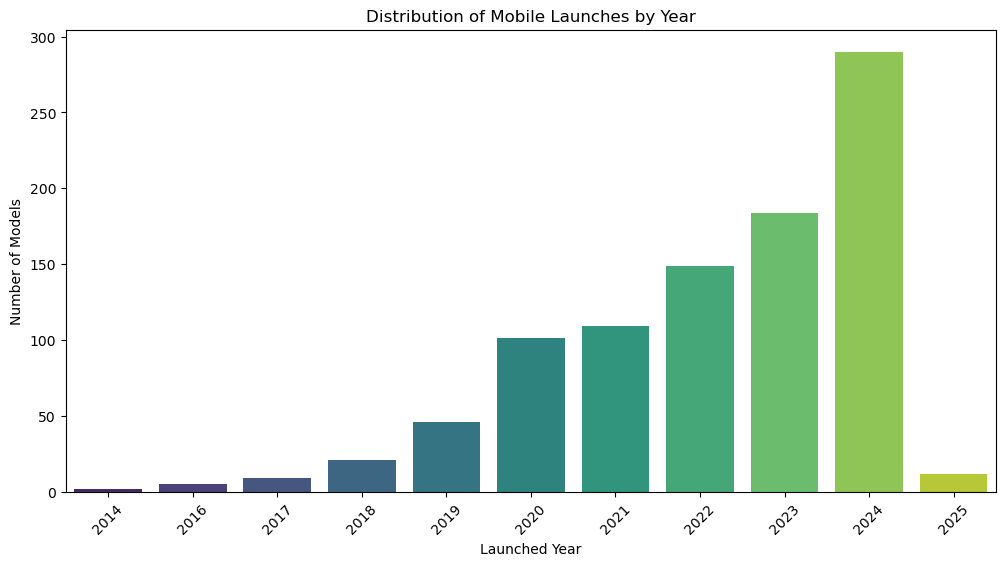

In [180]:
plt.figure(figsize=(12, 6)) 
sns.countplot(x='Launched Year', data=df, palette='viridis') #counterplot -> counts the frequency of  every x and displays in y , virdis = better visuals
plt.title('Distribution of Mobile Launches by Year')
plt.xlabel('Launched Year')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show() 

In [181]:
print("Insights:")
print("• The surge in market demand for smartphones, driven by technological advancements and consumer needs, has significantly boosted production, leading to innovation, diverse models, and fierce competition among brands.")


Insights:
• The surge in market demand for smartphones, driven by technological advancements and consumer needs, has significantly boosted production, leading to innovation, diverse models, and fierce competition among brands.


In [182]:
print("Brand Market share & Pricing strategy: ")


Brand Market share & Pricing strategy: 


In [183]:
mobile_counts = df['Company Name'].value_counts().sort_values(ascending=False)
mobile_counts

Company Name
Oppo        129
Apple        97
Honor        91
Vivo         86
Samsung      86
Realme       69
Motorola     62
Infinix      56
OnePlus      53
Huawei       42
Tecno        39
POCO         30
Xiaomi       27
Google       21
Lenovo       15
Nokia        11
Sony          9
iQOO          3
Poco          2
Name: count, dtype: int64

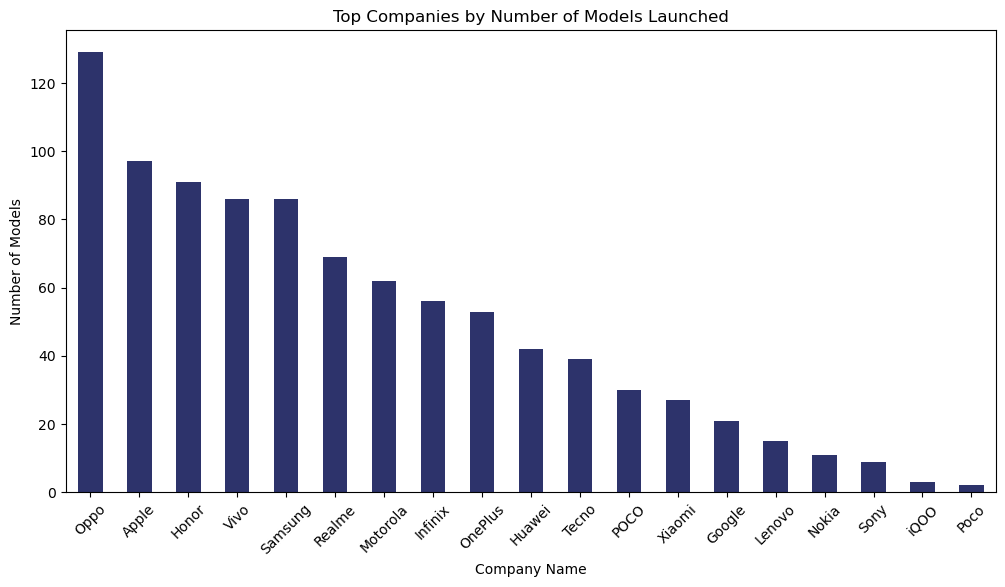

In [184]:
plt.figure(figsize=(12, 6))
mobile_counts.plot(kind='bar', color='#2D336B')
plt.title('Top Companies by Number of Models Launched')
plt.xlabel('Company Name')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.show()

In [185]:
# Insights
insights = [
    "Oppo, Apple, and Honor lead in the number of models.",
    "Xiaomi has fewer models than expected, possibly due to a refined strategy.",
    "Google, Lenovo, and Nokia remain niche players focusing on specific segments."
]

# Printing Insights
print("Insights:")
for insight in insights:
    print(f"• {insight}")


Insights:
• Oppo, Apple, and Honor lead in the number of models.
• Xiaomi has fewer models than expected, possibly due to a refined strategy.
• Google, Lenovo, and Nokia remain niche players focusing on specific segments.


In [186]:
print("Price Variations Across Countries: ")

Price Variations Across Countries: 


In [187]:
avg_price_by_country = df[
    ["Launched Price (Pakistan) (USD)", 
     "Launched Price (India) (USD)", 
     "Launched Price (China) (USD)", 
     "Launched Price (USA) (USD)", 
     "Launched Price (Dubai) (USD)"]
].mean().sort_values(ascending=False)
avg_price_by_country

Launched Price (USA) (USD)         622.383254
Launched Price (India) (USD)       603.497108
Launched Price (Dubai) (USD)       586.307328
Launched Price (China) (USD)       531.325948
Launched Price (Pakistan) (USD)    449.709455
dtype: float64

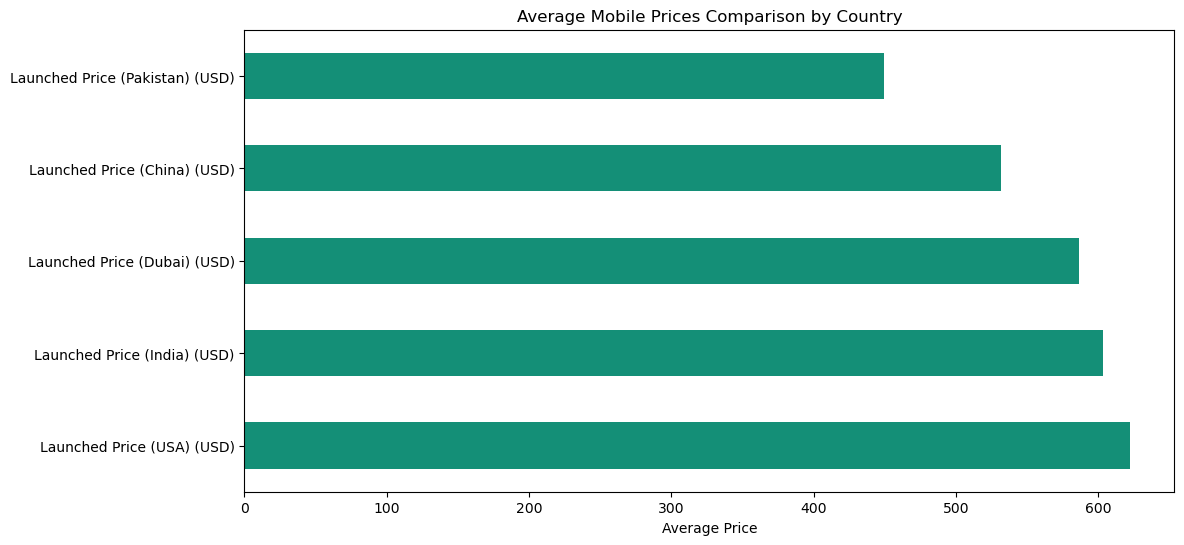

In [188]:
plt.figure(figsize=(12, 6))
avg_price_by_country.plot(kind='barh', color='#148F77')
plt.title('Average Mobile Prices Comparison by Country')
plt.xlabel('Average Price')
plt.show()

In [189]:
# Insights
insights = [
    "USA has the highest prices (622) due to taxes and premium branding.",
    "India (603) and Dubai (586) are slightly cheaper but still relatively high.",
    "China (531) has lower prices due to local manufacturing.",
    "Pakistan (450) has the lowest prices as brands focus on affordability."
]

# Printing Insights
print("Insights:")
for insight in insights:
    print(f"• {insight}")


Insights:
• USA has the highest prices (622) due to taxes and premium branding.
• India (603) and Dubai (586) are slightly cheaper but still relatively high.
• China (531) has lower prices due to local manufacturing.
• Pakistan (450) has the lowest prices as brands focus on affordability.


In [190]:
print("Best Front Camera: ")

Best Front Camera: 


In [191]:
df['Front Camera'] = df['Front Camera'].astype(str).str.extract('(\d+)', expand=False).astype(float)
top_15_phones = df.nlargest(15, 'Front Camera')
top_15_phones[['Model Name', 'Front Camera']]

,Model Name,Front Camera
608,Moto X50 Ultra 512GB,60.0
611,Edge 50 Ultra 512GB,60.0
637,Nova 10,60.0
638,Nova 10 Pro,60.0
647,Nova 11,60.0
648,Nova 11 Pro,60.0
649,Nova 11 Ultra,60.0
658,Nova 12,60.0
659,Nova 12 Pro,60.0
664,Nova 13 Pro 256GB,60.0


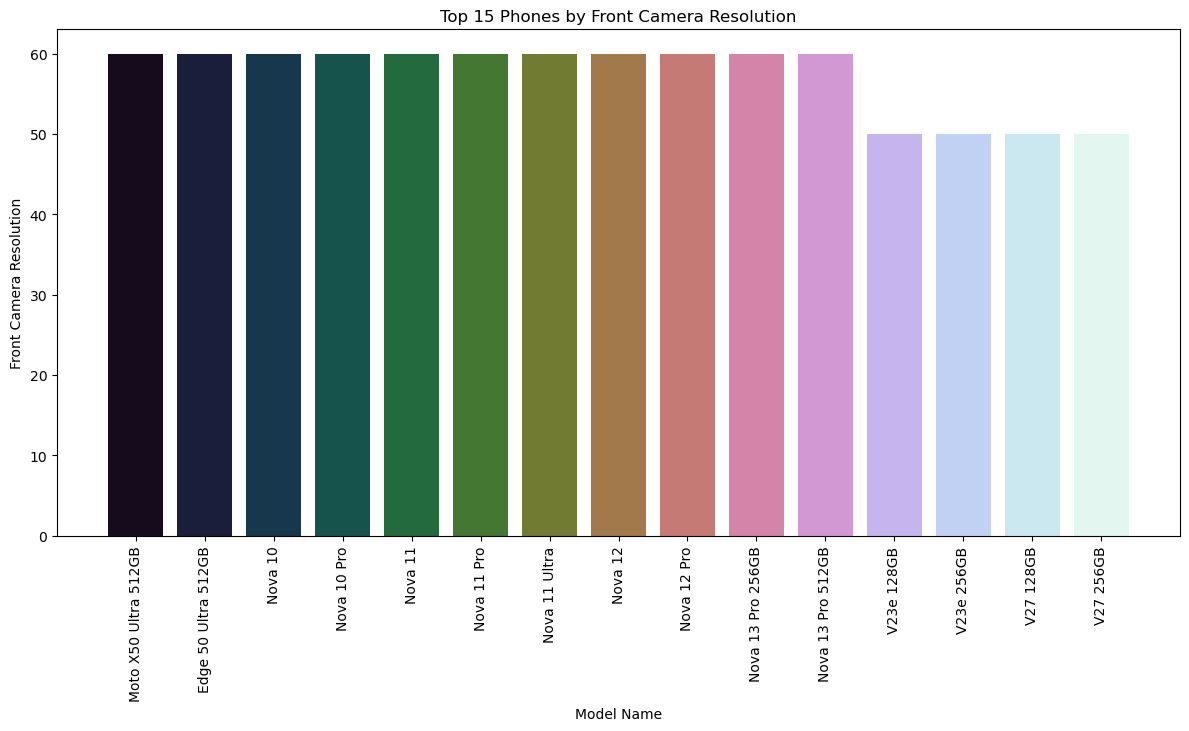

In [192]:
# Ensure 'Front Camera' is treated as string, then extract digits

color_palette = sns.color_palette('cubehelix', len(top_15_phones))
plt.figure(figsize=(12, 6))
plt.bar(top_15_phones['Model Name'], top_15_phones['Front Camera'],color=color_palette)
plt.xlabel('Model Name')
plt.ylabel('Front Camera Resolution')
plt.title('Top 15 Phones by Front Camera Resolution')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


In [193]:
# Camera Insights
camera_insights = [
    "Moto X50 Ultra 512GB has the best camera.",
    "Vivo and Nova, as brands, generally have better cameras."
]

# Printing Camera Insights
print("Camera Insights:")
for insight in camera_insights:
    print(f"• {insight}")


Camera Insights:
• Moto X50 Ultra 512GB has the best camera.
• Vivo and Nova, as brands, generally have better cameras.


In [194]:
print("Price Trend Analysis Over Years in India:")

Price Trend Analysis Over Years in India:


In [195]:
avg_price_per_year = df.groupby("Launched Year")["Launched Price (India) (USD)"].mean()
avg_price_per_year

Launched Year
2014    167.988000
2016    205.144800
2017    489.033333
2018    679.687429
2019    603.460696
2020    602.515485
2021    506.829688
2022    586.536322
2023    621.657848
2024    651.546124
2025    451.988000
Name: Launched Price (India) (USD), dtype: float64

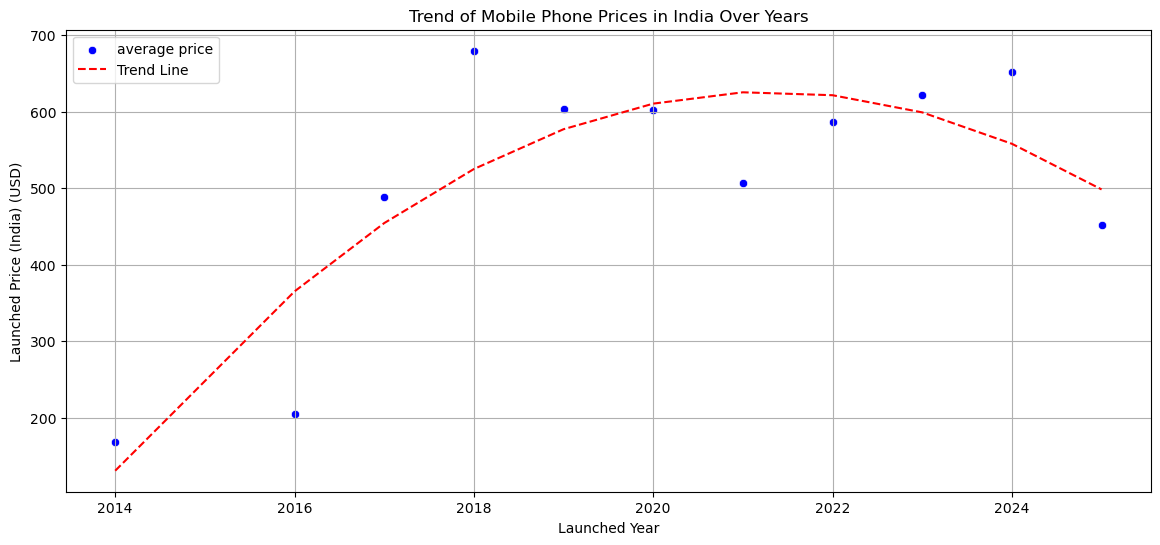

In [196]:
plt.figure(figsize=(14,6))

# Scatter plot of average prices
sns.scatterplot(x=avg_price_per_year.index,
               y=avg_price_per_year,
               label='average price',
               color='blue')

# Fit a polynomial trend line (degree=2)
z = np.polyfit(avg_price_per_year.index, avg_price_per_year, 2)
p = np.poly1d(z)

# Plot trend line
plt.plot(avg_price_per_year.index, p(avg_price_per_year.index), 
         color='red', linestyle="--", label="Trend Line")

plt.title("Trend of Mobile Phone Prices in India Over Years")
plt.legend()
plt.grid(True)
plt.show()

In [197]:
# Price Trends
price_trends = [
    "Steady Increase (2014 - 2018):\n  • Prices increased significantly from 167.99 (2014) → 679.69 (2018).\n  • Possible reasons:\n    - New technology\n    - Better features\n    - Higher consumer demand",
    "Fluctuations (2019 - 2021):\n  • Prices dropped from 679.69 (2018) to 506.83 (2021).\n  • Possible reasons:\n    - Competitive pricing from brands like Xiaomi & Realme\n    - Improved manufacturing efficiency\n    - More budget-friendly models in the market",
    "Recovery & Growth (2022 - 2024):\n  • Prices rose again from 506.83 (2021) → 651.54 (2024).\n  • Possible reasons:\n    - Adoption of 5G\n    - AI-powered cameras\n    - Premium features",
    "Price Drop in 2025:\n  • Sharp decline to 451.99 (2025).\n  • Possible reasons:\n    - Market saturation (most users already have a smartphone)\n    - Affordable models gaining popularity\n    - Economic factors (inflation, currency fluctuations)"
]

# Printing Price Trends
print("Price Trends:")
for trend in price_trends:
    print(f"• {trend}")


Price Trends:
• Steady Increase (2014 - 2018):
  • Prices increased significantly from 167.99 (2014) → 679.69 (2018).
  • Possible reasons:
    - New technology
    - Better features
    - Higher consumer demand
• Fluctuations (2019 - 2021):
  • Prices dropped from 679.69 (2018) to 506.83 (2021).
  • Possible reasons:
    - Competitive pricing from brands like Xiaomi & Realme
    - Improved manufacturing efficiency
    - More budget-friendly models in the market
• Recovery & Growth (2022 - 2024):
  • Prices rose again from 506.83 (2021) → 651.54 (2024).
  • Possible reasons:
    - Adoption of 5G
    - AI-powered cameras
    - Premium features
• Price Drop in 2025:
  • Sharp decline to 451.99 (2025).
  • Possible reasons:
    - Market saturation (most users already have a smartphone)
    - Affordable models gaining popularity
    - Economic factors (inflation, currency fluctuations)


In [198]:
print("Relationship between RAM and Price in India: ")

Relationship between RAM and Price in India: 


In [199]:
avg_price_per_ram = df.groupby('RAM')['Launched Price (India) (USD)'].mean()
avg_price_per_ram

RAM
1.0      117.988000
2.0      117.970000
3.0      298.954941
4.0      390.470301
6.0      527.332136
8.0      557.237187
10.0     611.988000
12.0     920.318513
16.0    1098.181548
Name: Launched Price (India) (USD), dtype: float64

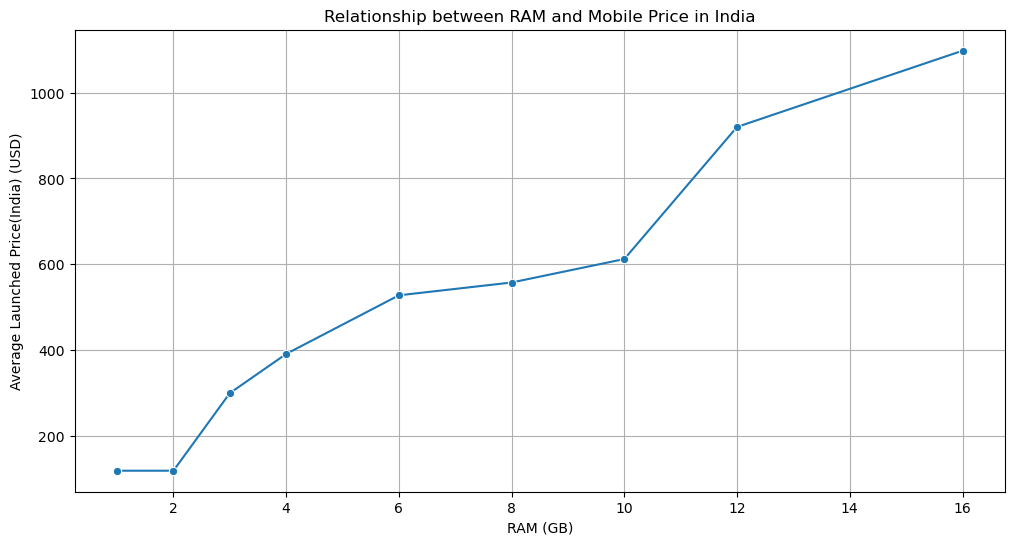

In [200]:
plt.figure(figsize=(12,6))
sns.lineplot(x=avg_price_per_ram.index,
             y=avg_price_per_ram,
             marker='o')

plt.xlabel("RAM (GB)")
plt.ylabel("Average Launched Price(India) (USD)")
plt.title("Relationship between RAM and Mobile Price in India")
plt.grid(True)
plt.show()

In [201]:
# Insight
print("• The average price of mobile phones increases with RAM, indicating a positive correlation between RAM size and price.")


• The average price of mobile phones increases with RAM, indicating a positive correlation between RAM size and price.


In [202]:
print("Pricing strategy in India:")

Pricing strategy in India:


In [203]:
brand_pricing_india=df.groupby("Company Name")["Launched Price (India) (USD)"].describe()
brand_pricing_india = brand_pricing_india.sort_values(by="mean", ascending=False)
brand_pricing_india = brand_pricing_india.reset_index()
brand_pricing_india


,Company Name,count,mean,std,min,25%,50%,75%,max
0,Apple,97.0,1235.983175,354.118213,358.800,1018.800,1199.988,1439.988,2398.800
1,Huawei,42.0,1233.582857,807.235774,419.988,659.988,1019.988,1439.988,3299.988
2,Sony,9.0,1099.988000,368.646172,599.988,719.988,1139.988,1439.988,1559.988
3,Google,21.0,843.988000,430.753758,383.988,539.988,719.988,959.988,2159.988
4,Samsung,86.0,729.946884,515.008203,101.988,239.907,749.988,1124.097,2123.988
5,Xiaomi,27.0,687.099111,389.265712,179.988,317.988,839.988,1019.988,1319.988
6,Honor,91.0,586.207780,447.336557,131.988,263.988,419.988,779.988,1919.988
7,OnePlus,53.0,548.818189,235.164569,155.988,335.988,539.988,719.988,899.988
8,iQOO,3.0,527.988000,72.000000,455.988,491.988,527.988,563.988,599.988
9,Oppo,129.0,525.101395,354.589273,107.988,263.988,443.988,599.988,1919.988


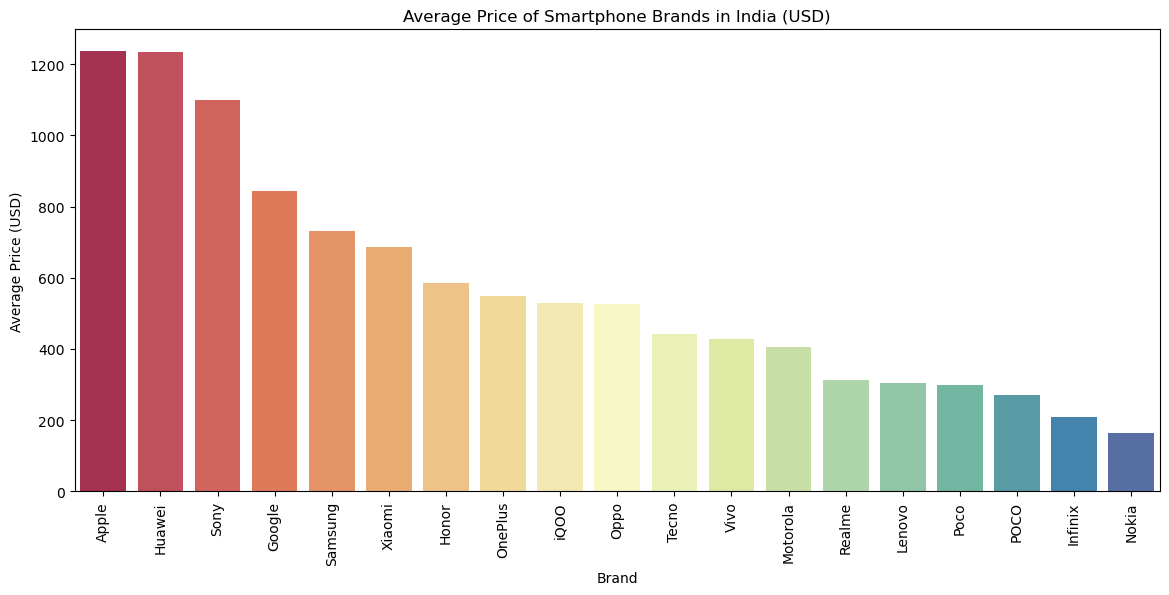

In [204]:
plt.figure(figsize=(14, 6))
sns.barplot(data=brand_pricing_india, x="Company Name", y="mean", palette="Spectral")
plt.xticks(rotation=90)  # Rotate brand names for better readability
plt.title("Average Price of Smartphone Brands in India (USD)")
plt.xlabel("Brand")
plt.ylabel("Average Price (USD)")
plt.show()

In [205]:
# Insights
insights = [
    "Apple, Huawei, and Sony cater to premium buyers, so their marketing likely targets professionals and tech enthusiasts.",
    "Xiaomi, OnePlus, and Oppo provide value-for-money alternatives, attracting younger and tech-savvy consumers.",
    "Infinix & Nokia focus on affordability, making them appealing for first-time smartphone users or those in price-sensitive markets."
]

# Printing Insights
print("Insights:")
for insight in insights:
    print(f"• {insight}")


Insights:
• Apple, Huawei, and Sony cater to premium buyers, so their marketing likely targets professionals and tech enthusiasts.
• Xiaomi, OnePlus, and Oppo provide value-for-money alternatives, attracting younger and tech-savvy consumers.
• Infinix & Nokia focus on affordability, making them appealing for first-time smartphone users or those in price-sensitive markets.


In [206]:
print("Branding Strategies Across Countries:")

Branding Strategies Across Countries:


In [207]:
company_avg_price = df.groupby("Company Name")[
    ["Launched Price (Pakistan) (USD)", 
     "Launched Price (India) (USD)", 
     "Launched Price (China) (USD)", 
     "Launched Price (USA) (USD)", 
     "Launched Price (Dubai) (USD)"]
].mean()
company_avg_price


,Launched Price (Pakistan) (USD),Launched Price (India) (USD),Launched Price (China) (USD),Launched Price (USA) (USD),Launched Price (Dubai) (USD)
Company Name,,,,,
Apple,891.460318,1235.983175,1005.423711,1028.484536,994.554742
Google,620.567829,843.988000,848.526667,755.190476,816.158571
Honor,432.629367,586.207780,471.706154,607.571429,605.746484
Huawei,660.725143,1233.582857,960.790000,1116.571429,1126.015714
Infinix,158.074971,207.845143,218.610000,245.071429,245.863929
Lenovo,226.796400,304.708800,294.784000,311.666667,316.530000
Motorola,329.686723,404.310581,378.311613,433.258065,433.467581
Nokia,186.542182,165.260727,162.145455,3760.181818,178.200000
OnePlus,485.317291,548.818189,552.992075,608.622642,663.013019


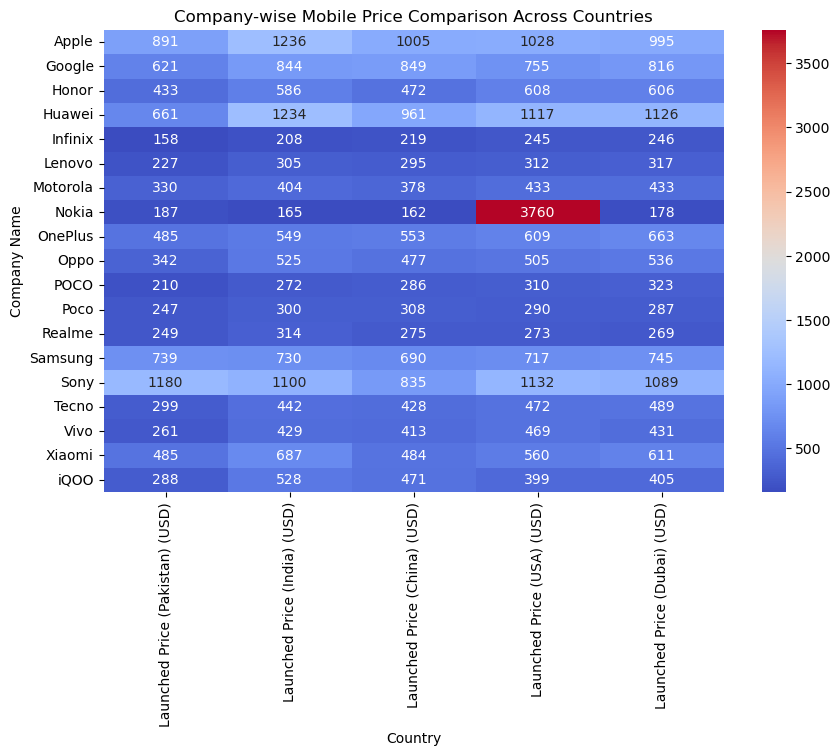

In [208]:
plt.figure(figsize=(10,6))
sns.heatmap(company_avg_price, annot=True, fmt=".0f", cmap="coolwarm")

plt.title("Company-wise Mobile Price Comparison Across Countries")
plt.xlabel("Country")
plt.ylabel("Company Name")
plt.show()

In [209]:
# Price Insights
price_insights = [
    "Nokia has a significant outlier in the USA (3760), much higher than other regions. This may be a data entry issue or an extreme pricing case.",
    "Apple, Sony, and Huawei have the highest prices across all regions.",
    "Pakistan generally has the lowest prices, while India and the USA have higher prices.",
    "Budget brands like Infinix, Tecno, and Lenovo have consistently low prices across all countries."
]

# Printing Price Insights
print("Price Insights:")
for insight in price_insights:
    print(f"• {insight}")


Price Insights:
• Nokia has a significant outlier in the USA (3760), much higher than other regions. This may be a data entry issue or an extreme pricing case.
• Apple, Sony, and Huawei have the highest prices across all regions.
• Pakistan generally has the lowest prices, while India and the USA have higher prices.
• Budget brands like Infinix, Tecno, and Lenovo have consistently low prices across all countries.


In [210]:
# Conclusion for Mobile Price Analysis
conclusion = [
    "Feature Influence on Price: Certain features, such as battery capacity, RAM, and storage, have a strong correlation with mobile price. Higher-end models generally offer better specifications, justifying their price point.",
    "Brand Segmentation: Different brands cater to specific price segments, with premium brands focusing on flagship devices while budget-friendly brands offer competitive features at lower prices.",
    "Market Trends: The data suggests clear pricing strategies, such as some brands prioritizing performance while others focus on affordability and accessibility.",
    "Potential Applications: These insights can help businesses optimize pricing strategies, assist consumers in making informed purchase decisions, and support data-driven marketing approaches."
]

# Printing Conclusion
print("Conclusion for Mobile Price Analysis:")
for point in conclusion:
    print(f"• {point}")


Conclusion for Mobile Price Analysis:
• Feature Influence on Price: Certain features, such as battery capacity, RAM, and storage, have a strong correlation with mobile price. Higher-end models generally offer better specifications, justifying their price point.
• Brand Segmentation: Different brands cater to specific price segments, with premium brands focusing on flagship devices while budget-friendly brands offer competitive features at lower prices.
• Market Trends: The data suggests clear pricing strategies, such as some brands prioritizing performance while others focus on affordability and accessibility.
• Potential Applications: These insights can help businesses optimize pricing strategies, assist consumers in making informed purchase decisions, and support data-driven marketing approaches.
